In [1]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## DIODE

In [3]:
path = "data/DIODE/train/outdoor/scene_00007/scan_00082"
files = sorted(glob.glob(os.path.join(path, "*.npy")))

In [4]:
avg_max = 0
for f in files:
    data = np.load(f)
    max_val = np.max(data)
    avg_max += max_val

avg_max /= len(files)

In [10]:
data = np.load(files[0])
data.max(), data.dtype

(156.64091, dtype('float32'))

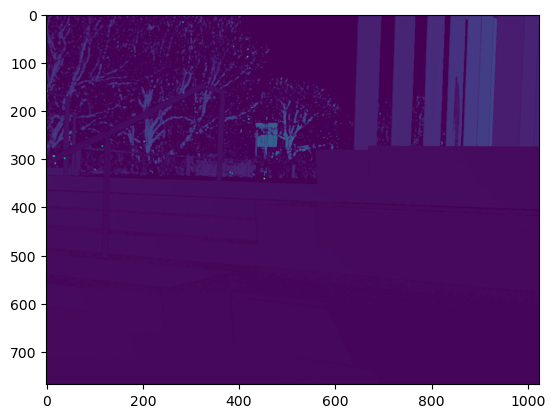

In [8]:
import matplotlib.pyplot as plt

# Load the first file
data = np.load(files[0])

# Display the data
plt.imshow(data)
plt.show()


## DeepLoc

In [22]:
path = "data/DeepLoc/test/LeftImages/Image_1160.png"

In [23]:
img = np.array(Image.open(path))
img.shape, img.min()

((720, 1280, 4), 0)

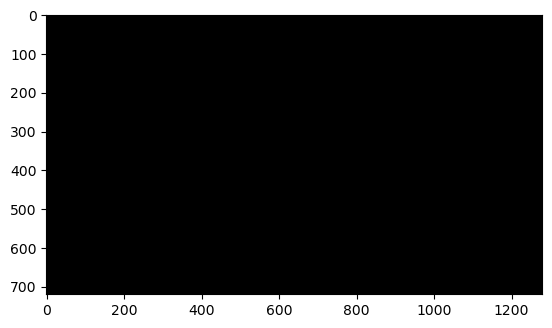

In [24]:
import matplotlib.pyplot as plt

# Select the 4th channel of the image
channel_4 = img[:,:,3]

# Display the 4th channel
plt.imshow(channel_4, cmap='gray')
plt.show()


## Figure out Poses

In [41]:
df = pd.read_csv(os.path.join('data/RELLIS/04', 'poses.txt'), header=None, sep=' ')
df.shape

(2059, 12)

In [42]:
poses = df.values.reshape(-1, 3, 4).astype(np.float32)

n, _, _ = poses.shape
pose_addition = np.full((poses.shape[0], 1, 4), [0, 0, 0, 1])
poses = np.concatenate([poses, pose_addition], axis=1)

In [45]:
poses.shape, poses[1]

((2059, 4, 4),
 array([[ 0.27535599, -0.96080899,  0.0320301 , -0.138726  ],
        [ 0.96134102,  0.275139  , -0.0110641 , -0.398296  ],
        [ 0.00181772,  0.0338384 ,  0.99942601,  0.165767  ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [ ]:

poses = torch.from_numpy(poses).float()

## RELLIS Depth

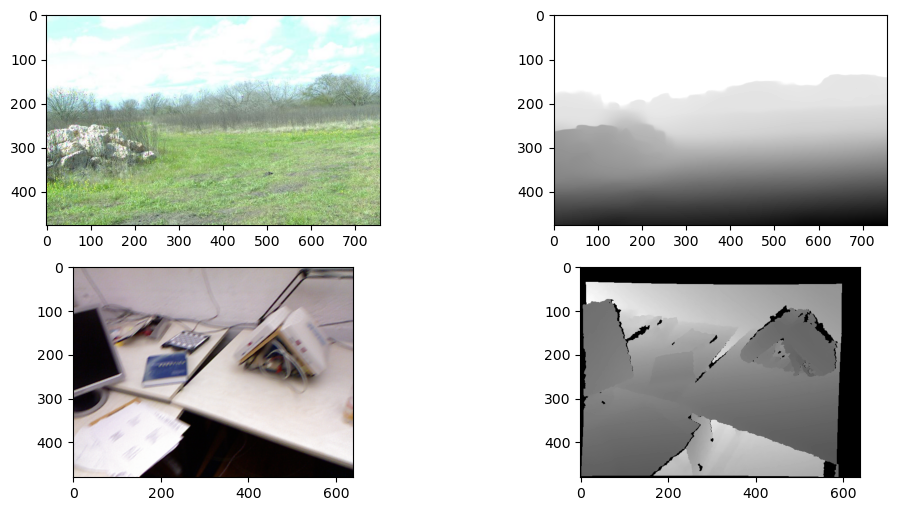

In [7]:
img_rellis = Image.open('data/RELLIS/04/images/frame000632.jpg')
depth_rellis = np.load('data/RELLIS/04/depth/frame000632.npy')

img_tum = Image.open('data/TUM_RGBD/rgbd_dataset_freiburg1_desk2/rgb/1305031526.671473.png')
depth_tum = np.array(Image.open('data/TUM_RGBD/rgbd_dataset_freiburg1_desk2/depth/1305031526.688356.png'))

# Display both side by side using pyplot
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0][0].imshow(img_rellis)
ax[0][1].imshow(depth_rellis, cmap='gray')

ax[1][0].imshow(img_tum)
ax[1][1].imshow(depth_tum, cmap='gray')

plt.show()

In [5]:
depth[-1][-1]

256.46008

In [8]:
depth.min(), depth.max()

(0, 11028)